In [47]:
# -----------
# User Instructions
#
# Implement a PD controller by running 100 iterations
# of robot motion. The steering angle should be set
# by the parameter tau_p and tau_d so that:
#
# steering = -tau_p * CTE - tau_d * diff_CTE
# where differential crosstrack error (diff_CTE)
# is given by CTE(t) - CTE(t-1)
#
#
# Only modify code at the bottom! Look for the TODO
# ------------
 
import random
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------
# 
# this is the Robot class
#

class Robot(object):
    def __init__(self, length=20.0):
        """
        Creates robot and initializes location/orientation to 0, 0, 0.
        """
        self.x = 0.0
        self.y = 0.0
        self.orientation = 0.0
        self.length = length
        self.steering_noise = 0.0
        self.distance_noise = 0.0
        self.steering_drift = 0.0

    def set(self, x, y, orientation):
        """
        Sets a robot coordinate.
        """
        self.x = x
        self.y = y
        self.orientation = orientation % (2.0 * np.pi)

    def set_noise(self, steering_noise, distance_noise):
        """
        Sets the noise parameters.
        """
        # makes it possible to change the noise parameters
        # this is often useful in particle filters
        self.steering_noise = steering_noise
        self.distance_noise = distance_noise

    def set_steering_drift(self, drift):
        """
        Sets the systematical steering drift parameter
        """
        self.steering_drift = drift

    def move(self, steering, distance, tolerance=0.001, max_steering_angle=np.pi / 4.0):
        """
        steering = front wheel steering angle, limited by max_steering_angle
        distance = total distance driven, most be non-negative
        """
        if steering > max_steering_angle:
            steering = max_steering_angle
        if steering < -max_steering_angle:
            steering = -max_steering_angle
        if distance < 0.0:
            distance = 0.0

        # apply noise
        steering2 = random.gauss(steering, self.steering_noise)
        distance2 = random.gauss(distance, self.distance_noise)

        # apply steering drift
        steering2 += self.steering_drift

        # Execute motion
        turn = np.tan(steering2) * distance2 / self.length

        if abs(turn) < tolerance:
            # approximate by straight line motion
            self.x += distance2 * np.cos(self.orientation)
            self.y += distance2 * np.sin(self.orientation)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
        else:
            # approximate bicycle model for motion
            radius = distance2 / turn
            cx = self.x - (np.sin(self.orientation) * radius)
            cy = self.y + (np.cos(self.orientation) * radius)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
            self.x = cx + (np.sin(self.orientation) * radius)
            self.y = cy - (np.cos(self.orientation) * radius)

    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f]' % (self.x, self.y, self.orientation)

 


In [48]:
############## ADD / MODIFY CODE BELOW ####################
# ------------------------------------------------------------------------
#
# run - does a single control run

# previous P controller
def run_p(robot, tau, n=100, speed=1.0):
    x_trajectory = []
    y_trajectory = []
    for i in range(n):
        cte = robot.y
        steer = -tau * cte
        robot.move(steer, speed)
        x_trajectory.append(robot.x)
        y_trajectory.append(robot.y)
    return x_trajectory, y_trajectory
   

In [49]:
def run(robot, tau_p, tau_d, n=100, speed=1.0):
    x_trajectory = []
    y_trajectory = []
    # TODO: your code here
    prev_cte = robot.y
    for i in range(n):
        cte = robot.y
        diff_cte = cte - prev_cte
        prev_cte = cte
        steer = -tau_p * cte - tau_d * diff_cte
        robot.move(steer, speed)
        x_trajectory.append(robot.x)
        y_trajectory.append(robot.y)
        print(robot)

    return x_trajectory, y_trajectory

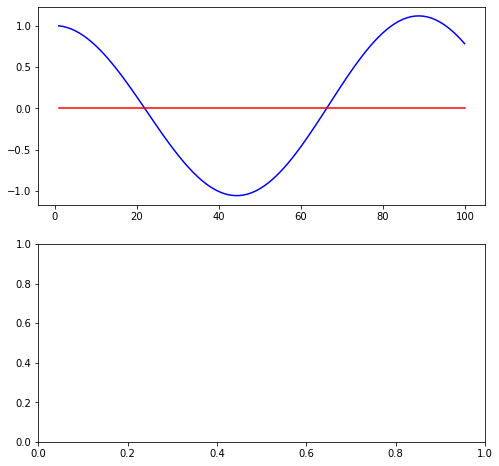

In [50]:



robot = Robot()
robot.set(0, 1, 0) 
x_trajectory, y_trajectory = run_p(robot, 0.1)
n = len(x_trajectory)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.plot(x_trajectory, y_trajectory, 'b', label='P controller')
ax1.plot(x_trajectory, np.zeros(n), 'r', label='reference')

plt.savefig("P_Contrl.png")

[x=0.99998 y=0.99493 orient=6.27305]
[x=1.99987 y=0.98015 orient=6.26376]
[x=2.99960 y=0.95690 orient=6.25611]
[x=3.99914 y=0.92678 orient=6.25000]
[x=4.99851 y=0.89122 orient=6.24524]
[x=5.99772 y=0.85149 orient=6.24165]
[x=6.99680 y=0.80869 orient=6.23910]
[x=7.99579 y=0.76378 orient=6.23743]
[x=8.99475 y=0.71804 orient=6.23653]
[x=9.99366 y=0.67140 orient=6.23621]
[x=10.99255 y=0.62444 orient=6.23649]
[x=11.99146 y=0.57776 orient=6.23729]
[x=12.99044 y=0.53249 orient=6.23851]
[x=13.98947 y=0.48856 orient=6.23998]
[x=14.98858 y=0.44622 orient=6.24168]
[x=15.98775 y=0.40568 orient=6.24357]
[x=16.98701 y=0.36709 orient=6.24560]
[x=17.98634 y=0.33057 orient=6.24772]
[x=18.98575 y=0.29619 orient=6.24989]
[x=19.98523 y=0.26400 orient=6.25209]
[x=20.98478 y=0.23401 orient=6.25428]
[x=21.98440 y=0.20618 orient=6.25644]
[x=22.98407 y=0.18049 orient=6.25855]
[x=23.98379 y=0.15689 orient=6.26060]
[x=24.98355 y=0.13529 orient=6.26257]
[x=25.98336 y=0.11562 orient=6.26446]
[x=26.98320 y=0.09780 

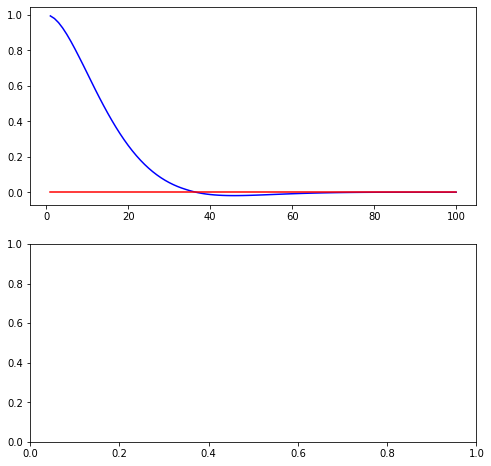

In [51]:
robot = Robot()
robot.set(0, 1, 0) 
x_trajectory, y_trajectory = run(robot, 0.2,3.0)
n = len(x_trajectory)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.plot(x_trajectory, y_trajectory, 'b', label='PD controller')
ax1.plot(x_trajectory, np.zeros(n), 'r', label='reference')
plt.savefig("PD_Contrl.png")